# Step 1:- Import Libraries, Read File, Understand Data 
(Continuously incorporate new libraries as needed to address specific requirements.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import statsmodels.api as sm
from scipy.stats import shapiro, anderson
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.svm import SVR
from sklearn.tree import plot_tree,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
lisbon_house_df=pd.read_csv('../data/lisbon-houses.csv')

In [3]:
lisbon_house_df.head()

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.78,-9.12,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.71,-9.18,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.71,-9.16,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.75,-9.16,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.73,-9.13,Portugal,Lisboa,Lisboa,Arroios,3277,570000


In [4]:
lisbon_house_df.describe(include='all')

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
count,246.00,246,246,246,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246,246,246,246,246.00,246.00
unique,NaN,4,2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,24,NaN,NaN
top,NaN,New,Homes,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal,Lisboa,Lisboa,Marvila,NaN,NaN
freq,NaN,96,239,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246,246,246,51,NaN,NaN
mean,226.67,NaN,NaN,NaN,2.49,1.85,109.66,219.33,0.15,38.73,-9.14,NaN,NaN,NaN,NaN,3487.87,551658.76
std,72.31,NaN,NaN,NaN,1.35,1.03,66.26,132.52,0.50,0.02,0.03,NaN,NaN,NaN,NaN,715.90,422091.56
min,101.00,NaN,NaN,NaN,0.00,0.00,23.00,46.00,0.00,38.70,-9.22,NaN,NaN,NaN,NaN,2393.00,85000.00
25%,166.25,NaN,NaN,NaN,2.00,1.00,64.25,128.50,0.00,38.72,-9.16,NaN,NaN,NaN,NaN,2881.00,271250.00
50%,227.50,NaN,NaN,NaN,2.00,2.00,90.00,180.00,0.00,38.73,-9.14,NaN,NaN,NaN,NaN,3402.00,450000.00
75%,288.75,NaN,NaN,NaN,3.00,2.00,145.00,290.00,0.00,38.75,-9.11,NaN,NaN,NaN,NaN,3859.00,715000.00


In [5]:
list(set(lisbon_house_df.select_dtypes(include = ['float64', 'int64']).columns.to_list()) - {'Id'})

['Parking',
 'Price',
 'AreaNet',
 'Latitude',
 'Bathrooms',
 'AreaGross',
 'Longitude',
 'Bedrooms',
 'Price M2']

In [6]:
lisbon_house_df

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.78,-9.12,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.71,-9.18,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.71,-9.16,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.75,-9.16,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.73,-9.13,Portugal,Lisboa,Lisboa,Arroios,3277,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,346,For Refurbishment,Homes,Apartment,2,1,66,132,0,38.75,-9.18,Portugal,Lisboa,Lisboa,Benfica,2727,196500
242,347,For Refurbishment,Homes,Apartment,3,1,75,150,0,38.72,-9.13,Portugal,Lisboa,Lisboa,Santa Maria Maior,4807,245000
243,348,For Refurbishment,Single Habitation,Townhouse Dwelling,2,1,90,180,0,38.77,-9.11,Portugal,Lisboa,Lisboa,Olivais,2463,486000
244,349,For Refurbishment,Single Habitation,Dwelling,4,3,121,242,0,38.70,-9.20,Portugal,Lisboa,Lisboa,Belem,3542,375000


In [7]:
quaretile1_X=lisbon_house_df['Price'].describe()["25%"]
quaretile3_X=lisbon_house_df['Price'].describe()["75%"]
iqr=quaretile3_X-quaretile1_X
upper_outlier=quaretile3_X+1.5*iqr#data outside of lower end
outliers=lisbon_house_df[lisbon_house_df['Price']>upper_outlier]
outliers

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
43,144,Used,Homes,Apartment,8,6,299,598,0,38.74,-9.15,Portugal,Lisboa,Lisboa,Avenidas Novas,3841,1700000
50,151,Used,Single Habitation,Isolated Villa,11,6,573,1146,0,38.75,-9.13,Portugal,Lisboa,Lisboa,Alvalade,3623,1750000
144,249,New,Homes,Duplex,6,5,336,672,0,38.71,-9.13,Portugal,Lisboa,Lisboa,Santa Maria Maior,4807,4150000
145,250,New,Homes,Apartment,6,5,359,718,0,38.77,-9.16,Portugal,Lisboa,Lisboa,Lumiar,2927,1650000
146,251,New,Homes,Duplex,5,4,225,450,0,38.75,-9.18,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,1450000
149,254,As New,Homes,Apartment,1,1,135,270,0,38.71,-9.14,Portugal,Lisboa,Lisboa,Santa Maria Maior,4807,1499000
150,255,As New,Homes,Apartment,4,4,245,490,0,38.75,-9.15,Portugal,Lisboa,Lisboa,Alvalade,3623,1500000
179,284,As New,Homes,Apartment,3,4,192,384,0,38.70,-9.22,Portugal,Lisboa,Lisboa,Belem,3542,1390000
195,300,As New,Homes,Apartment,4,5,212,424,0,38.73,-9.15,Portugal,Lisboa,Lisboa,Avenidas Novas,3841,2200000


# Step 2:- Preprocessing Data

Delete duplicate entries if present.

In [8]:
lisbon_house_df.drop_duplicates(inplace=True)

Verify the count of null and distinct values in each column

In [9]:
unique_counts=lisbon_house_df.nunique()
null_counts=lisbon_house_df.isnull().sum()
summary_df=pd.DataFrame({'Unique_Counts':unique_counts,'Null_Counts':null_counts})
summary_df

,Unique_Counts,Null_Counts
Id,246,0
Condition,4,0
PropertyType,2,0
PropertySubType,8,0
Bedrooms,10,0
Bathrooms,7,0
AreaNet,123,0
AreaGross,123,0
Parking,4,0
Latitude,139,0


Three columns in our dataset contain only one unique value. It's essential to assess whether these values are relevant to our data analysis or if we can safely remove them.

In [10]:
columns_with_one_entry={col:lisbon_house_df[col].unique().tolist() for col in 
                        ['Country','District','Municipality']}
columns_with_one_entry

{'Country': ['Portugal'], 'District': ['Lisboa'], 'Municipality': ['Lisboa']}

1. Based on the preliminary analysis, these four columns appear to be redundant and may not significantly contribute to the data analysis. Therefore, they can be considered for removal.
2. Since the data frame already has an index column, the 'Id' column is redundant and can be safely removed.

In [11]:
lisbon_house_df=lisbon_house_df.drop(['Country','District','Municipality','Id'],axis=1)

Below 4 columns contain very few unique values. It's essential to evaluate the relevance of these columns for data analysis.

In [12]:
columns_with_few_entries={col:lisbon_house_df[col].unique().tolist() for col in 
                          ['Condition','PropertyType','PropertySubType','Parking']}
columns_with_few_entries

{'Condition': ['Used', 'New', 'As New', 'For Refurbishment'],
 'PropertyType': ['Homes', 'Single Habitation'],
 'PropertySubType': ['Apartment',
  'Duplex',
  'Dwelling',
  'Isolated Villa',
  'Penthouse',
  'Studio',
  'Apart Hotel',
  'Townhouse Dwelling'],
 'Parking': [0, 2, 1, 3]}

In [13]:
lisbon_house_df.groupby('PropertyType').size()

PropertyType
Homes                239
Single Habitation      7
dtype: int64

In [14]:
lisbon_house_df[lisbon_house_df['PropertyType']=='Single Habitation'].head(3)

,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price
49,Used,Single Habitation,Dwelling,5,3,190,380,0,38.77,-9.12,Olivais,2463,850000
50,Used,Single Habitation,Isolated Villa,11,6,573,1146,0,38.75,-9.13,Alvalade,3623,1750000
199,As New,Single Habitation,Townhouse Dwelling,6,3,208,416,0,38.75,-9.21,Benfica,2727,790000


In [15]:
lisbon_house_df[~lisbon_house_df['PropertySubType'].isin(['Townhouse Dwelling','Dwelling',
                                                          'Isolated Villa'])].groupby('PropertySubType').size()

PropertySubType
Apart Hotel      1
Apartment      226
Duplex           9
Penthouse        1
Studio           2
dtype: int64

We cannot exclude these columns as they provide valuable real-world insights, despite their initial appearance as outliers.

AreaNet and AreaGross columns appear to be closely related and could potentially be combined into a single 'usable area' column using feature engineering. Initially, I had planned to do this, but during the house purchasing process, the net area is considered the most crucial aspect. If we calculate a ratio, it implies that we are attributing equal significance to both columns. However, this isn't always the case. Therefore, I decided to omit this step and retain both columns in their original form.

Trying to create clusters based on the longitude and latitude values.

In [16]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(lisbon_house_df[['Latitude','Longitude']])
#lisbon_house_df['Zone'] = kmeans.labels_
lisbon_house_df.insert(10,'Zone',kmeans.labels_)
lisbon_house_df.sort_values('Zone').head(5)

,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Zone,Parish,Price M2,Price
0,Used,Homes,Apartment,3,1,76,152,0,38.78,-9.12,0,Olivais,2463,198000
113,New,Homes,Apartment,2,1,152,304,0,38.75,-9.10,0,Marvila,2881,700000
112,New,Homes,Apartment,1,1,76,152,0,38.75,-9.10,0,Marvila,2881,515000
111,New,Homes,Apartment,1,1,79,158,0,38.75,-9.10,0,Marvila,2881,475000
110,New,Homes,Apartment,1,1,79,158,0,38.75,-9.10,0,Marvila,2881,450000


Since we now have the zone information to differentiate areas, we can consider creating a separate dataframe without the latitude, longitude, and parish columns. However, before proceeding with creating the new dataframe, a thorough analysis is necessary to determine if all the columns are still required.

In [17]:
lisbon_house_df['Price M2'].corr(lisbon_house_df['Price'])

0.039089070236362836

The Price M2 column can be disregarded for two reasons: Firstly, the correlation between the two variables is very low, suggesting that one does not provide significant information about the other. Secondly, in practical scenarios, we would not have access to Price M2 to predict house prices, making this feature irrelevant for our purposes.

In [18]:
selected_columns=['Condition','PropertyType','PropertySubType','Bedrooms','Bathrooms','AreaNet','AreaGross','Parking','Zone','Price']
lisbon_house_price_df=lisbon_house_df[selected_columns].copy()

In [19]:
lisbon_house_price_df.head(3)

,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Zone,Price
0,Used,Homes,Apartment,3,1,76,152,0,0,198000
1,Used,Homes,Duplex,5,3,190,380,0,3,1270000
2,Used,Homes,Apartment,1,1,26,52,0,3,140000


<h3>Categorical to Numerical</h3>

To convert the categorical data in columns 'Condition', 'PropertyType', and 'PropertySubType' to numerical representations, we will employ manual mapping for the first two columns and one-hot encoding for the third column. Manual mapping is appropriate for 'Condition' and 'PropertyType' since the values clearly indicate an inherent ordering ('Used' is older than 'As New', 'New' is newer than 'As New', etc.).

In [20]:
condition_mapping = {'New': 4, 'As New': 3, 'Used': 1, 'For Refurbishment': 1}
lisbon_house_price_df['Condition'] = lisbon_house_price_df['Condition'].map(condition_mapping).fillna(lisbon_house_price_df['Condition'])
property_type_mapping = {'Homes': 1, 'Single Habitation': 2}
lisbon_house_price_df['PropertyType'] = lisbon_house_price_df['PropertyType'].map(property_type_mapping).fillna(lisbon_house_price_df['PropertyType'])

In [21]:
#propertySubTypeDummies=pd.get_dummies(lisbon_house_price_df['PropertySubType'])
#lisbon_house_price_df=pd.concat([lisbon_house_price_df.drop('PropertySubType',axis=1),propertySubTypeDummies],axis=1)
#creating dummies did not work great so changing the approach
property_sub_type_mapping = {'Apart Hotel':1, 'Studio': 2, 'Apartment': 3, 'Dwelling': 4, 'Penthouse': 5, 'Duplex': 6, 'Townhouse Dwelling': 7, 'Isolated Villa':8}
lisbon_house_price_df['PropertySubType'] = lisbon_house_price_df['PropertySubType'].map(property_sub_type_mapping).fillna(lisbon_house_price_df['PropertySubType'])

In [22]:
lisbon_house_price_df.head(3)

,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Zone,Price
0,1,1,3,3,1,76,152,0,0,198000
1,1,1,6,5,3,190,380,0,3,1270000
2,1,1,3,1,1,26,52,0,3,140000


# Step 3:- Visualize Data
To gain a comprehensive understanding of the data and determine the most suitable modeling approach:
<br>
<b>Visualize Data:</b> Employ graphical representations, such as histograms, scatter plots, and box plots, to visualize the distribution, patterns, and relationships within the data.
<br>
<b>Analyze Data Distribution:</b> Assess the distribution of each feature using descriptive statistics and visualizations to identify outliers, skewness, and potential data irregularities.

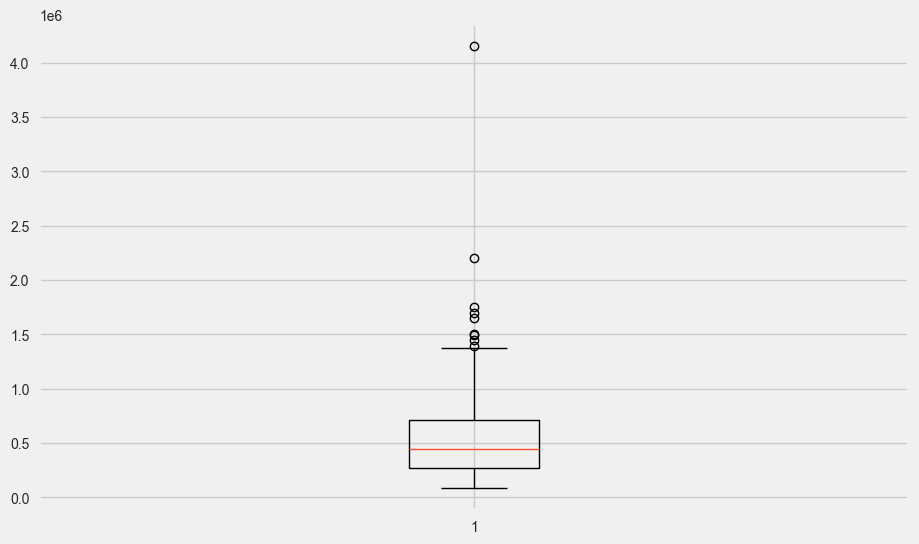

In [23]:
plt.figure(figsize=(10,6))
plt.boxplot(lisbon_house_price_df['Price'])
plt.show()

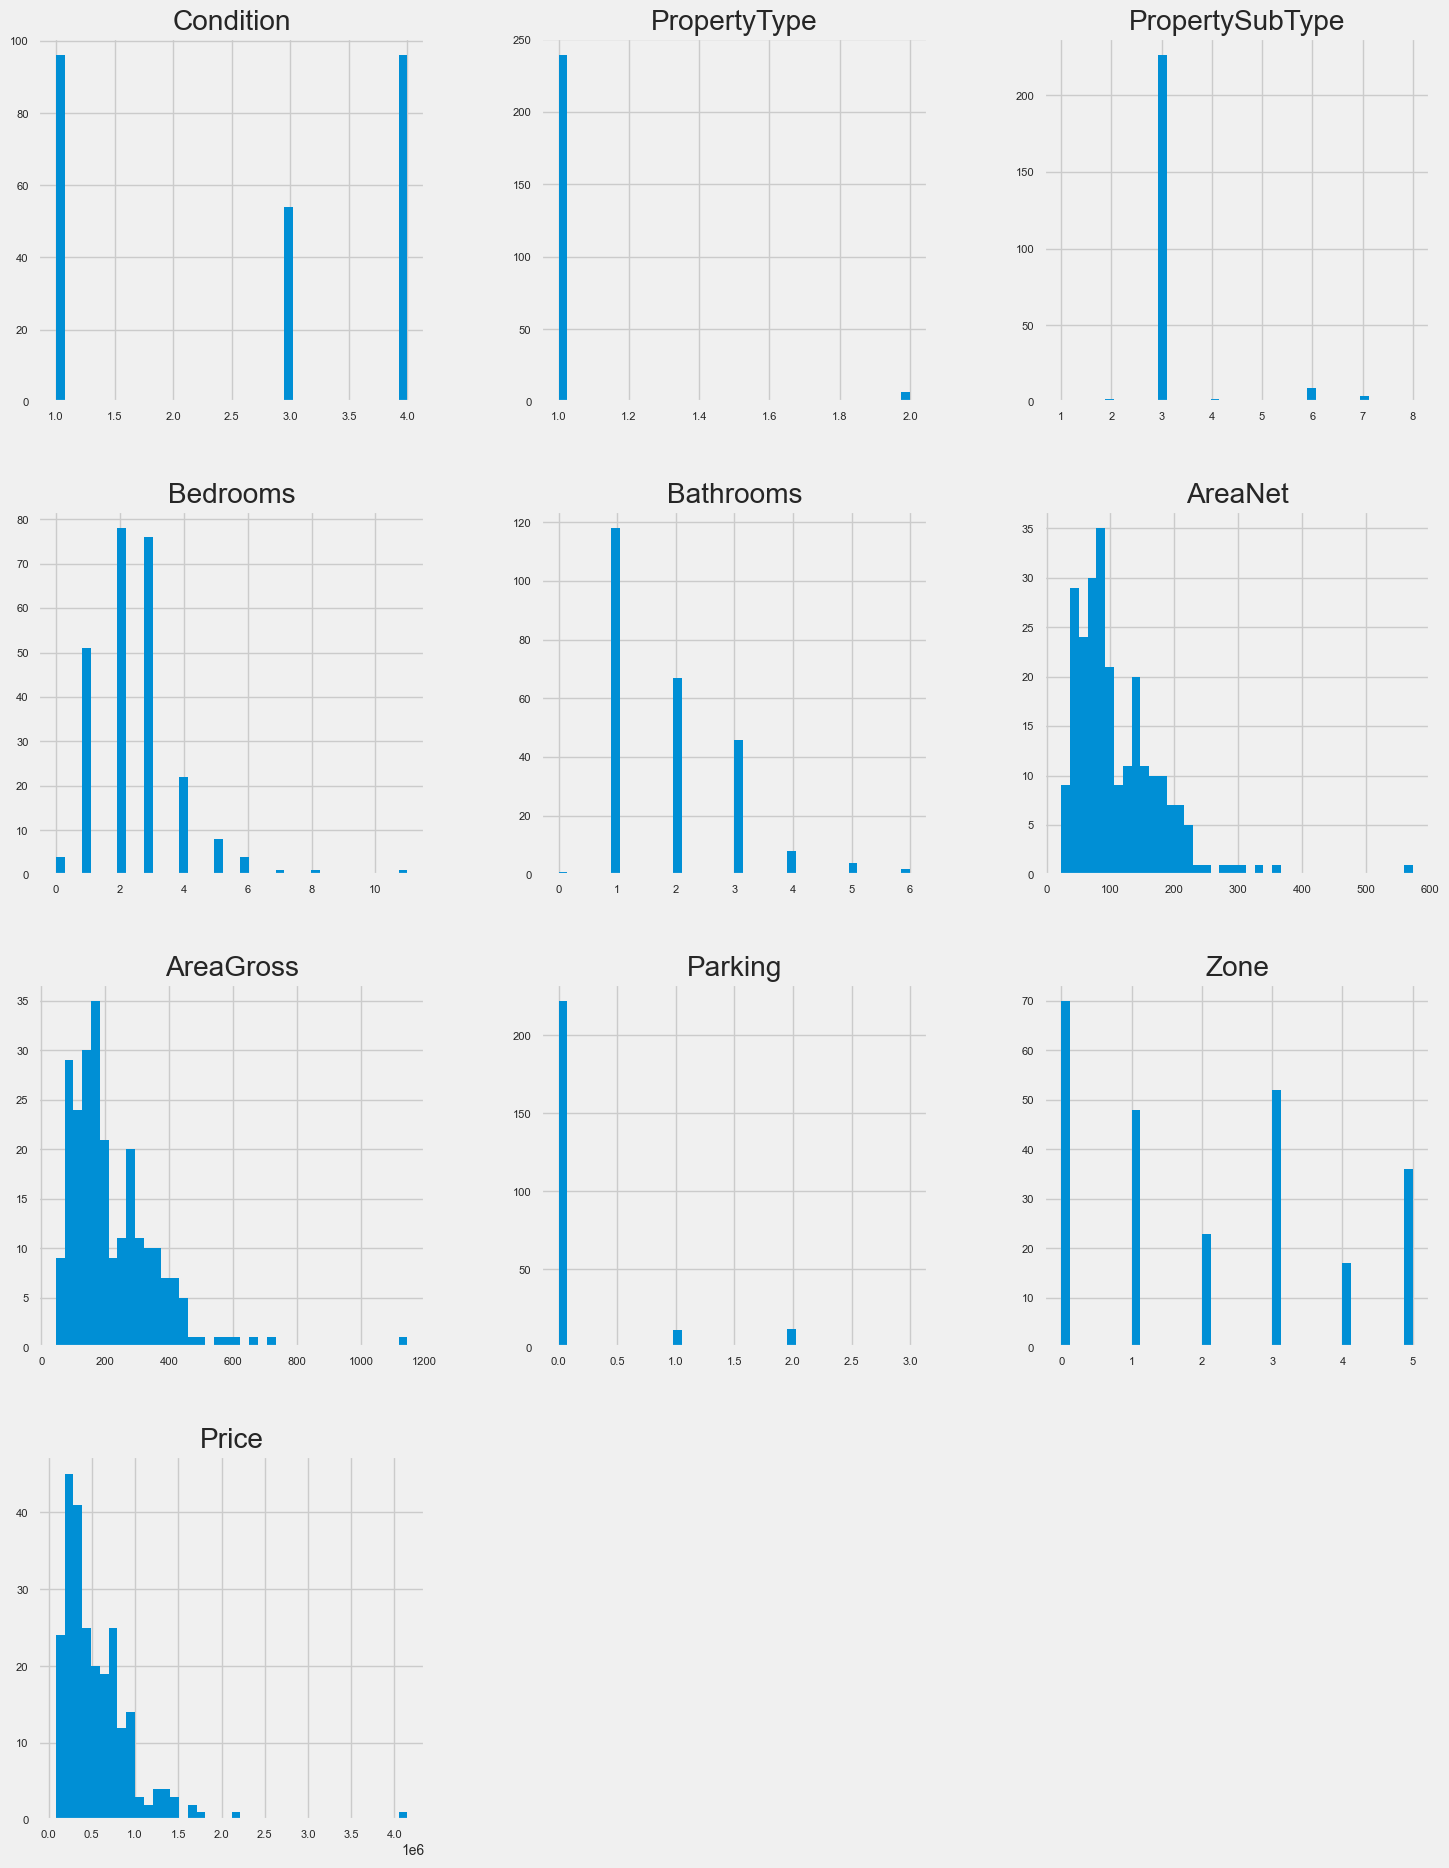

In [24]:
lisbon_house_price_df.hist(figsize=(16,22),bins=40,xlabelsize=8, ylabelsize=8);

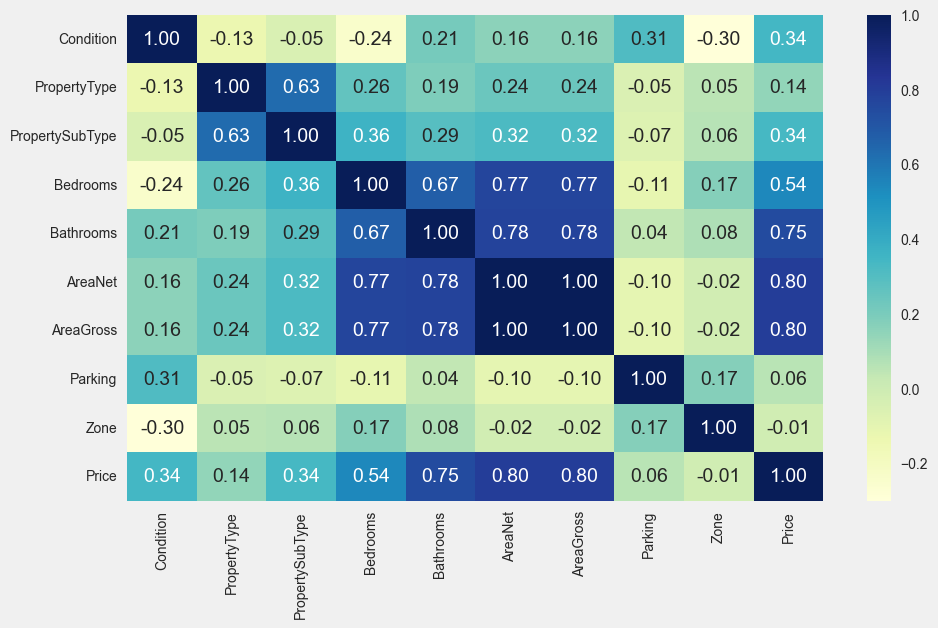

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(lisbon_house_price_df.corr(),cmap='YlGnBu',annot=True,fmt='.2f')
plt.show()

In [26]:
correlation_matrix=lisbon_house_price_df.corr()
correlation_matrix

,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Zone,Price
Condition,1.00,-0.13,-0.05,-0.24,0.21,0.16,0.16,0.31,-0.30,0.34
PropertyType,-0.13,1.00,0.63,0.26,0.19,0.24,0.24,-0.05,0.05,0.14
PropertySubType,-0.05,0.63,1.00,0.36,0.29,0.32,0.32,-0.07,0.06,0.34
Bedrooms,-0.24,0.26,0.36,1.00,0.67,0.77,0.77,-0.11,0.17,0.54
Bathrooms,0.21,0.19,0.29,0.67,1.00,0.78,0.78,0.04,0.08,0.75
AreaNet,0.16,0.24,0.32,0.77,0.78,1.00,1.00,-0.10,-0.02,0.80
AreaGross,0.16,0.24,0.32,0.77,0.78,1.00,1.00,-0.10,-0.02,0.80
Parking,0.31,-0.05,-0.07,-0.11,0.04,-0.10,-0.10,1.00,0.17,0.06
Zone,-0.30,0.05,0.06,0.17,0.08,-0.02,-0.02,0.17,1.00,-0.01
Price,0.34,0.14,0.34,0.54,0.75,0.80,0.80,0.06,-0.01,1.00


A detailed examination of Gross Area and Net Area reveals a striking resemblance in their behavior. Their relationships with other columns exhibit an exact overlap. Therefore, eliminating Gross Area and retaining Net Area as the sole feature.

In [27]:
X=lisbon_house_price_df[['Condition','PropertyType','PropertySubType','Bedrooms','Bathrooms','AreaNet', 'Zone', 'Parking']]
#removed 'Zone' from the feature. There is no change in the performance without this independent variable
y=lisbon_house_price_df[['Price']]

In [28]:
for column in ['Condition','PropertyType','PropertySubType','Bedrooms','Bathrooms','AreaNet', 'Zone', 'Parking']:
    stat, p = shapiro(lisbon_house_price_df[column])
    print(f'Shapiro-Wilk Test for {column}: Statistic={stat}, p-value={p}')

    result = anderson(lisbon_house_price_df[column])
    print(f'Anderson-Darling Test for {column}: Statistic={result.statistic}, Critical Values={result.critical_values}')
    print('*****************************************************')

Shapiro-Wilk Test for Condition: Statistic=0.7365421387069446, p-value=1.682784491527444e-19
Anderson-Darling Test for Condition: Statistic=27.740779822511968, Critical Values=[0.567 0.646 0.775 0.904 1.075]
*****************************************************
Shapiro-Wilk Test for PropertyType: Statistic=0.15382084255112594, p-value=9.215562629310774e-32
Anderson-Darling Test for PropertyType: Statistic=91.83097245957748, Critical Values=[0.567 0.646 0.775 0.904 1.075]
*****************************************************
Shapiro-Wilk Test for PropertySubType: Statistic=0.31958831122975406, p-value=3.136098097020716e-29
Anderson-Darling Test for PropertySubType: Statistic=79.1327552271656, Critical Values=[0.567 0.646 0.775 0.904 1.075]
*****************************************************
Shapiro-Wilk Test for Bedrooms: Statistic=0.8511114442191567, p-value=1.1800996303706769e-14
Anderson-Darling Test for Bedrooms: Statistic=9.47452235154293, Critical Values=[0.567 0.646 0.775 0.904

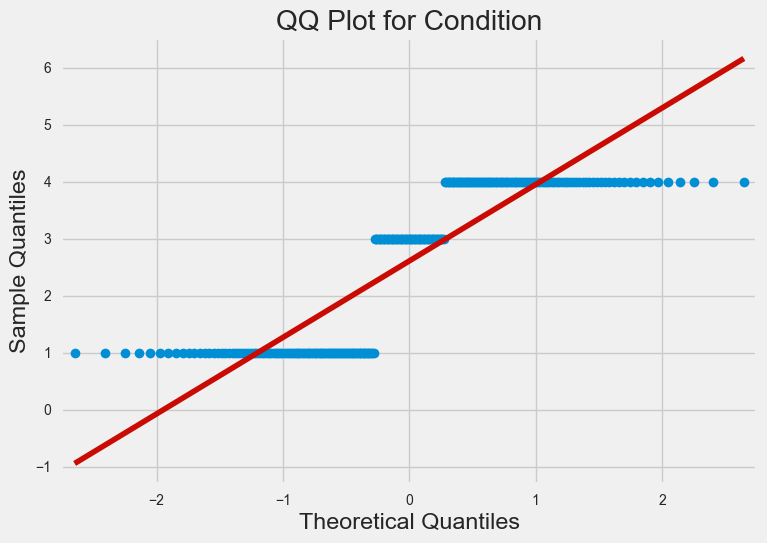

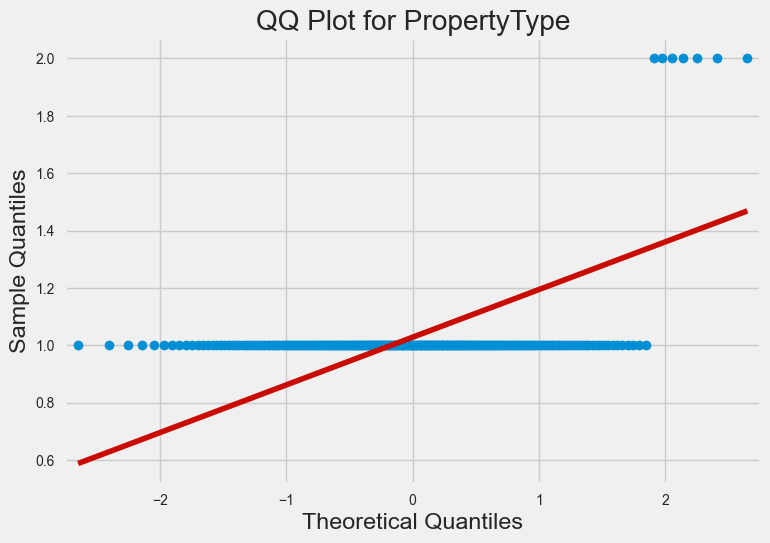

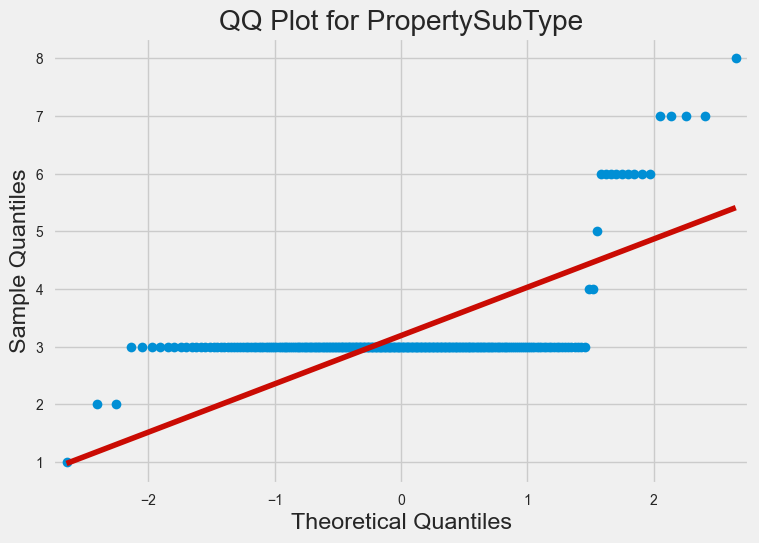

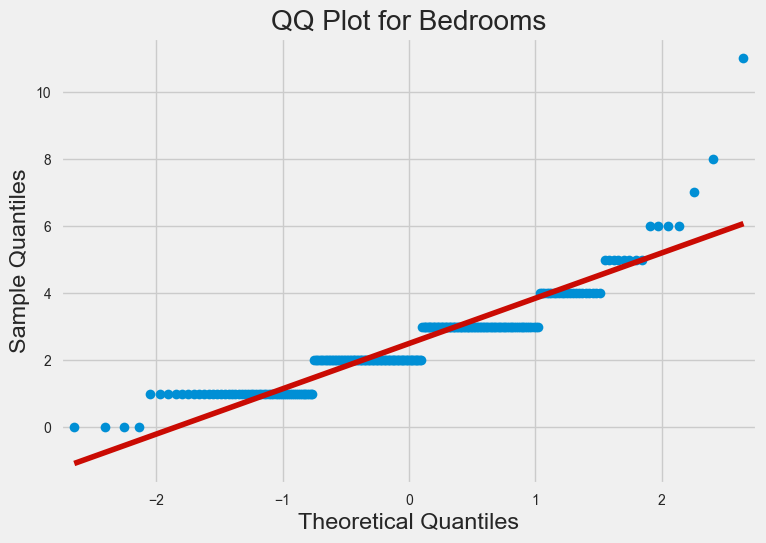

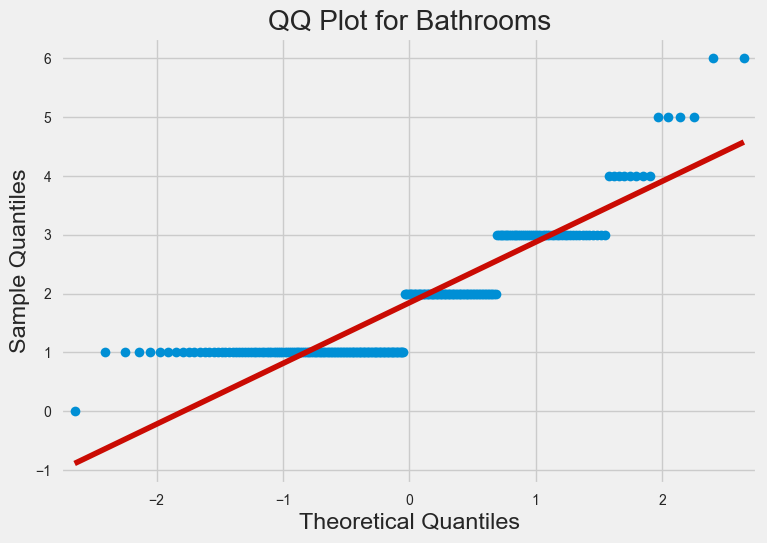

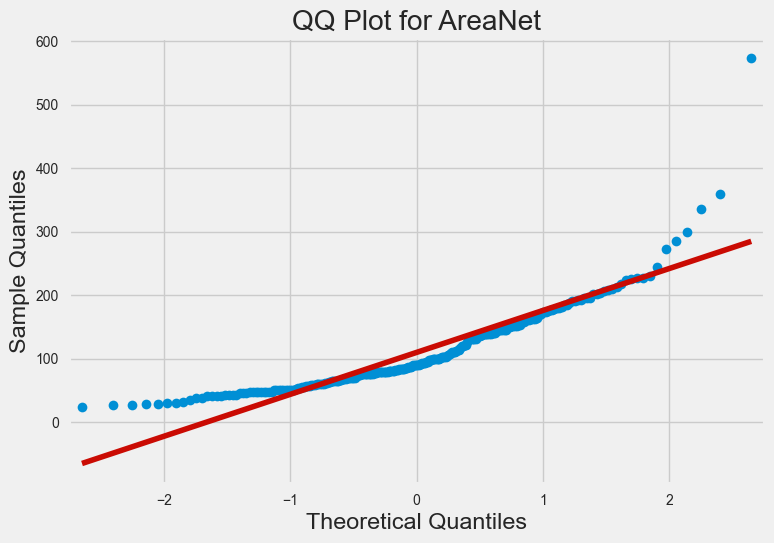

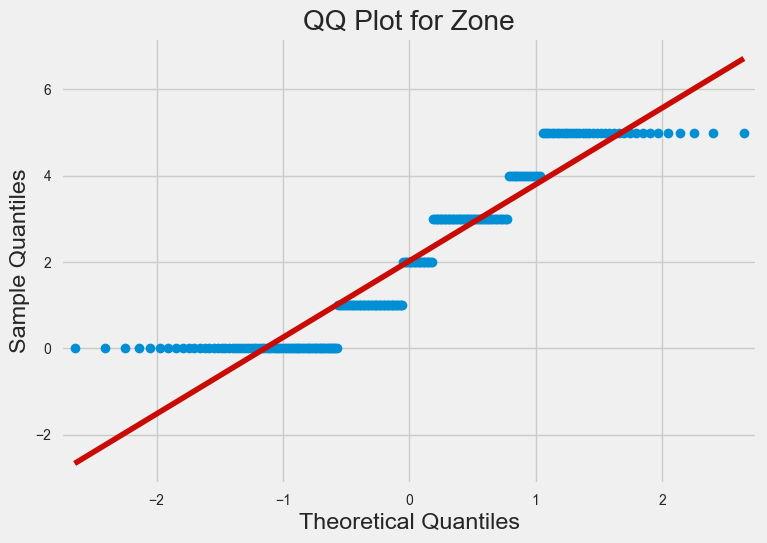

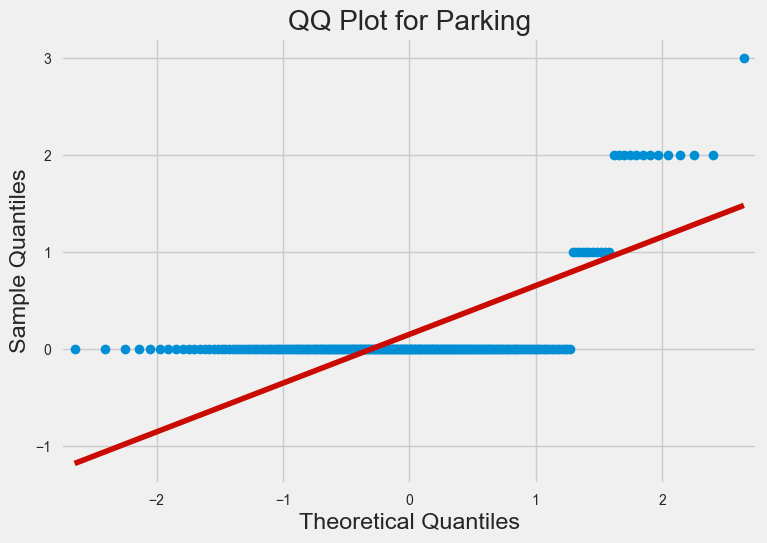

In [29]:
for column in ['Condition','PropertyType','PropertySubType','Bedrooms','Bathrooms','AreaNet', 'Zone','Parking']:
    sm.qqplot(lisbon_house_price_df[column], line='s')
    plt.title(f'QQ Plot for {column}')
    plt.show()

<b>Two preprocessing steps were removed due to their ineffectiveness:</b><br>
1. MinMaxScaler on all the features.
2. RobustScaler on all the features.
<br><b>Note:-</b>Standard Scaler was not performed as none of the features exhibited a normal distribution

In [30]:
lisbon_house_df['Price'].describe()

count       246.00
mean     551658.76
std      422091.56
min       85000.00
25%      271250.00
50%      450000.00
75%      715000.00
max     4150000.00
Name: Price, dtype: float64

# Step 4:- Split the data into Training and Validation sets

In [31]:
#split the dataset into train and test set into 80:20 respectively
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=42)

<h3><span style="color: brown;"> Common Executables </span>  </h3>These are used multiple times

In [32]:
def print_prediction(test_y, pred_y):
    #results_actual = pd.Series(test_y,name='Actual')
    results_predicted = pd.DataFrame(pred_y,columns=['Predicted'])
    results = pd.concat([test_y.reset_index(drop=True), results_predicted.reset_index(drop=True)], axis=1)
    results.columns=['Actual','Predicted']
    return results

In [33]:
def residual_check(test_y,pred_y):
    rmse_val=np.sqrt(mean_squared_error(test_y,pred_y))
    mae_val=mean_absolute_error(test_y,pred_y)
    r2_val=r2_score(test_y,pred_y)
    print("rmse= ",rmse_val,", mae= ",mae_val," and r2_score= ",r2_val)
    return rmse_val,mae_val,r2_val

In [34]:
def compare_evaluation_metric(original_model,current_model):
    mse_original=eval('rmse_'+original_model)
    mse_current=eval('rmse_'+current_model)
    mae_original=eval('mae_'+original_model)
    mae_current=eval('mae_'+current_model)
    r2_original=eval('r2_'+original_model)
    r2_current=eval('r2_'+current_model)
    print("RMSE wise, "+current_model+" is better model than "+original_model+" model, RMSE for "+original_model+" is= " +str(mse_original) if mse_original-mse_current>0 else "RMSE wise "+original_model+" is better, it's RMSE value is= "+str(mse_original))
    print("MAE wise, "+current_model+" is better model than "+original_model+" model, MAE for "+original_model+" is= " +str(mae_original) if mae_original-mae_current>0 else "MAE wise "+original_model+" is better, it's MAE value is= "+str(mae_original))
    print("R2 wise, "+current_model+" is better model than "+original_model+" model, R2 for "+original_model+" is= " +str(r2_original) if r2_current-r2_original>0 else "R2 wise "+original_model+" is better, it's R2 value is= "+str(r2_original))

# Step 5:- Find Correct Model

<h3><span style="color: brown;"> Cross Validation to select best model </span> </h3>

In [35]:
#Create a list of models to evaluate.
models = [LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), SVR(), 
          DecisionTreeRegressor(), RandomForestRegressor()]

#Iterate over the models and evaluate their performance using cross-validation.
for model in models:
    model_name=type(model).__name__
    scores= cross_val_score(model,X,y,cv=5,scoring='r2')
    avg_score=scores.mean()
    
    print(f'{model_name} - Average R^2 Score: {avg_score}')

LinearRegression - Average R^2 Score: 0.4365092742548337
Lasso - Average R^2 Score: 0.4366901745438657
Ridge - Average R^2 Score: 0.5392008222185214
KNeighborsRegressor - Average R^2 Score: 0.4958493612780647
SVR - Average R^2 Score: -0.3508156733320002
DecisionTreeRegressor - Average R^2 Score: 0.4221648232783938
RandomForestRegressor - Average R^2 Score: 0.6593207697911623


<span style="color: blue;">Lets see if this cross validation prediction is correct or not.</span>

<h2><span style="color: red;"> Model 1:- </span>Linear Regression Testing</h2> Observed a direct relationship between all the features and price. Therefore, will initiate analysis with this simplified model.

In [36]:
lisbon_house_price_linear_reg=LinearRegression().fit(train_X,train_y)
pred_y = lisbon_house_price_linear_reg.predict(test_X)

<h3><span style="color: brown;"> Feature Importance </span> </h3>

In [37]:
lisbon_house_price_linear_reg.coef_

array([[  36333.56639786, -405541.95310065,  115517.38944667,
         -48685.26346265,  117425.30028822,    4188.42803727,
           8604.97302617,   46007.96769925]])

In [38]:
print_prediction(test_y,pred_y).head(10)

,Actual,Predicted
0,168000,167700.99
1,130000,202099.93
2,580000,365564.73
3,740000,648787.43
4,520000,762063.93
5,660000,476645.28
6,210000,297658.36
7,920000,973021.58
8,925000,1236359.84
9,270000,394332.34


In [39]:
rmse_lin_reg,mae_lin_reg,r2_lin_reg=residual_check(test_y,pred_y)

rmse=  147866.89826490823 , mae=  109581.63672942627  and r2_score=  0.6114316407660798


In [40]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(196, 8) (196, 1) (50, 8) (50, 1)


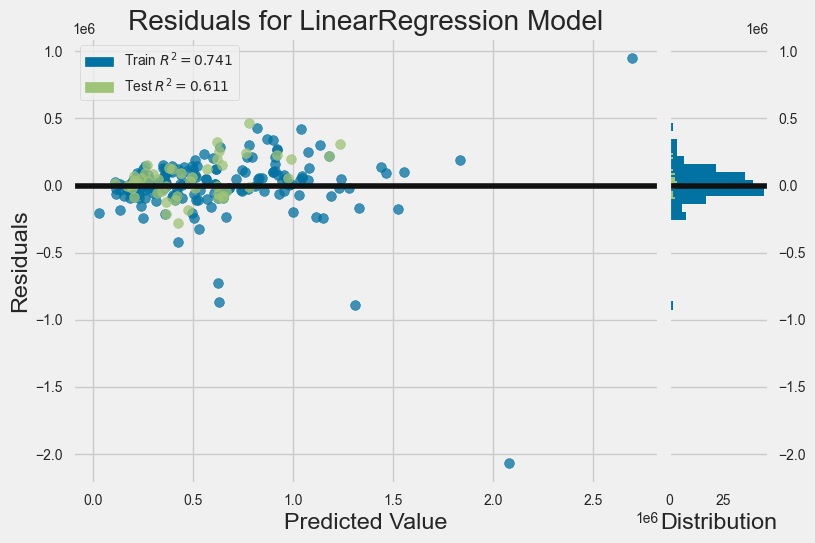

In [41]:
# Residuals Plot
visualizer_residuals = ResidualsPlot(lisbon_house_price_linear_reg)
visualizer_residuals.fit(train_X, train_y)
visualizer_residuals.score(test_X, test_y)
visualizer_residuals.show()

# Prediction Error Plot (this portion not working some error with yellow brick)
#visualizer_prediction_error = PredictionError(lisbon_house_price_linear_reg)
#visualizer_prediction_error.fit(train_X, train_y)
#visualizer_prediction_error.score(test_X, test_y)
#visualizer_prediction_error.show()

# Display the plots
plt.show()

<h2><span style="color: red;"> Model 2:- </span>LASSO REGRESSION TESTING </h2> L1 Regularization

In [42]:
lisbon_house_price_lasso=Lasso(alpha=0.1).fit(train_X,train_y)
pred_y = lisbon_house_price_lasso.predict(test_X)

<h3><span style="color: brown;"> Feature Importance </span> </h3>

In [43]:
lisbon_house_price_lasso.coef_

array([  36333.8575932 , -405532.82172651,  115516.25282259,
        -48684.79791699,  117425.09783819,    4188.42175643,
          8604.98604033,   46007.41954847])

In [44]:
print_prediction(test_y,pred_y).head(10)

,Actual,Predicted
0,168000,167700.94
1,130000,202100.15
2,580000,365565.02
3,740000,648787.62
4,520000,762064.08
5,660000,476645.83
6,210000,297658.44
7,920000,973021.65
8,925000,1236359.29
9,270000,394332.00


In [45]:
rmse_lasso,mae_lasso,r2_lasso=residual_check(test_y,pred_y)
compare_evaluation_metric('lin_reg','lasso')

rmse=  147866.52869799087 , mae=  109581.32278775357  and r2_score=  0.6114335830781583
RMSE wise, lasso is better model than lin_reg model, RMSE for lin_reg is= 147866.89826490823
MAE wise, lasso is better model than lin_reg model, MAE for lin_reg is= 109581.63672942627
R2 wise, lasso is better model than lin_reg model, R2 for lin_reg is= 0.6114316407660798


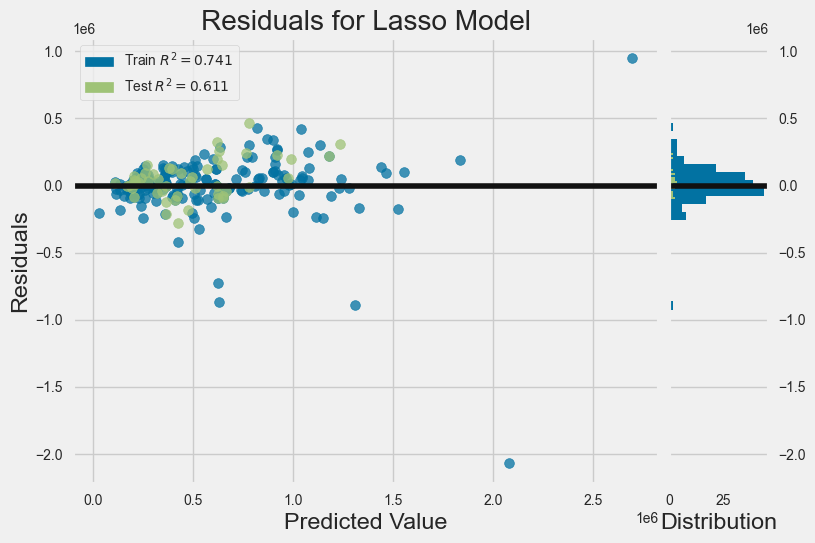

In [46]:
# Residuals Plot
visualizer_residuals = ResidualsPlot(lisbon_house_price_lasso)
visualizer_residuals.fit(train_X, train_y.values.ravel())
visualizer_residuals.score(test_X, test_y.values.ravel())
visualizer_residuals.show();

<h2><span style="color: red;"> Model 3:- </span>RIDGE REGRESSION </h2>L2 Regularization

In [47]:
lisbon_house_price_ridge=Ridge(alpha=0.1).fit(train_X,train_y)
pred_y=lisbon_house_price_ridge.predict(test_X)

<h3><span style="color: brown;"> Feature Importance </span> </h3>

In [48]:
lisbon_house_price_ridge.coef_

array([  36744.41929534, -388795.29221061,  113692.07666772,
        -48211.47948334,  117335.20473235,    4179.15026835,
          8653.04873493,   45603.63060025])

In [49]:
print_prediction(test_y,pred_y).head(10)

,Actual,Predicted
0,168000,167500.58
1,130000,201987.86
2,580000,365774.43
3,740000,648793.97
4,520000,762369.87
5,660000,477279.16
6,210000,297853.95
7,920000,972845.86
8,925000,1235162.97
9,270000,393764.19


In [50]:
rmse_ridge,mae_ridge,r2_ridge=residual_check(test_y,pred_y)
compare_evaluation_metric('lasso','ridge')

rmse=  147269.12026363693 , mae=  108978.75436083166  and r2_score=  0.6145670024765686
RMSE wise, ridge is better model than lasso model, RMSE for lasso is= 147866.52869799087
MAE wise, ridge is better model than lasso model, MAE for lasso is= 109581.32278775357
R2 wise, ridge is better model than lasso model, R2 for lasso is= 0.6114335830781583


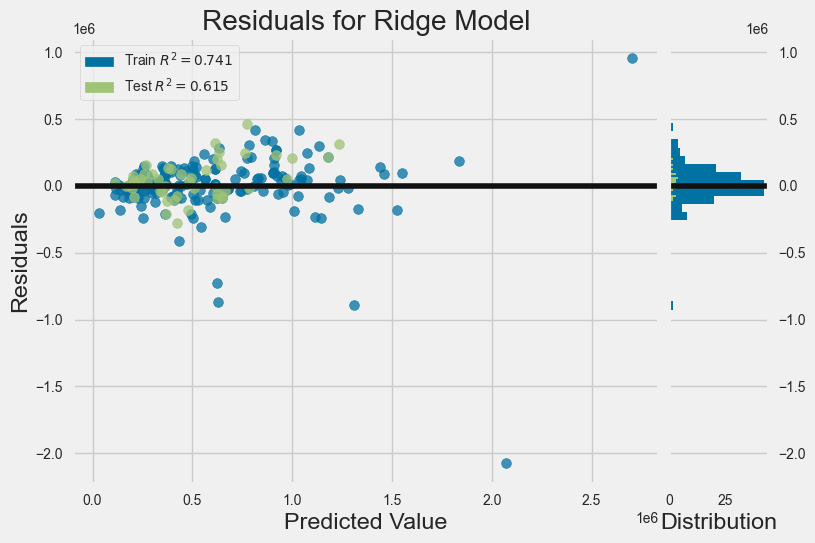

In [51]:
# Residuals Plot
visualizer_residuals = ResidualsPlot(lisbon_house_price_ridge)
visualizer_residuals.fit(train_X, train_y.values.ravel())
visualizer_residuals.score(test_X, test_y.values.ravel())
visualizer_residuals.show();

<h2><span style="color: red;"> Model 4:- </span>KNN Nearest Neighbour</h2> As our dataset is very small. Very easy to store in memory.

<h2><span style="color: brown;"> Hyper Parameter Tuning </span> Grid Search CV </h2>

In [52]:
n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]
gscv_knn = GridSearchCV(KNeighborsRegressor(), param_grid={"n_neighbors": n_neighbors}, cv=5, scoring="neg_mean_squared_error")
gscv_knn.fit(train_X, train_y)
print("Best number of neighbors:", gscv_knn.best_params_["n_neighbors"])

Best number of neighbors: 7


In [53]:
lisbon_house_price_knn=KNeighborsRegressor(n_neighbors=gscv_knn.best_params_["n_neighbors"]).fit(train_X,train_y)
pred_y=lisbon_house_price_knn.predict(test_X)

<h3><span style="color: brown;"> Feature Importance </span> </h3>

In [54]:
result = permutation_importance(lisbon_house_price_knn, test_X, test_y, n_repeats=10, random_state=42)
result.importances_mean

array([ 4.36711372e-02,  0.00000000e+00, -1.17440259e-04,  8.77563732e-03,
       -3.80216322e-03,  2.16538739e+00, -2.18081506e-02,  9.01258822e-04])

In [55]:
print_prediction(test_y,pred_y).head(10)

,Actual,Predicted
0,168000,226214.29
1,130000,358571.43
2,580000,350142.86
3,740000,679571.43
4,520000,624571.43
5,660000,436428.57
6,210000,244785.71
7,920000,1134285.71
8,925000,1776428.57
9,270000,420714.29


In [56]:
rmse_knn,mae_knn,r2_knn=residual_check(test_y,pred_y)
compare_evaluation_metric('ridge','knn')

rmse=  194752.45502631157 , mae=  134379.7142857143  and r2_score=  0.32595112275247784
RMSE wise ridge is better, it's RMSE value is= 147269.12026363693
MAE wise ridge is better, it's MAE value is= 108978.75436083166
R2 wise ridge is better, it's R2 value is= 0.6145670024765686


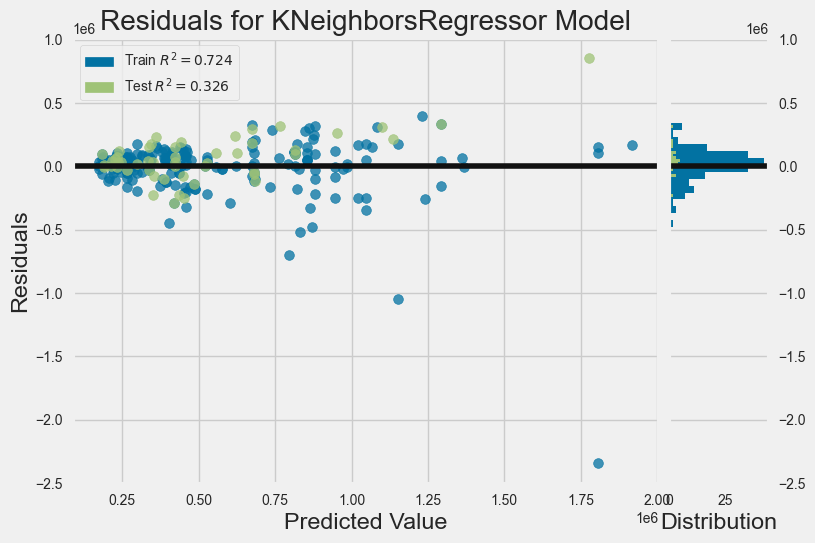

In [57]:
# Residuals Plot
visualizer_residuals = ResidualsPlot(lisbon_house_price_knn)
visualizer_residuals.fit(train_X, train_y)
visualizer_residuals.score(test_X, test_y)
visualizer_residuals.show();

only 34% of the dependent variables can be explained by independent variables. Not a great model.

<h2><span style="color: red;"> Model 5:- </span>SVM</h2> 1. As we know SVR works best woth small or medium sized data and we have small sized data. <br> 2. From graphs we have already seen our model is not linear and we know SVR works well when the relationship between predictors and the target variable is non linear or complex.

<h3><span style="color: brown;"> Hyper Parameter Tuning </span> Grid Search CV </h3>

In [58]:
# Define the range of values for C and gamma hyperparameters
c_values = [0.1, 1.0, 10.0,20.0,30.0]
gamma_values = ['scale', 'auto']
param_grid = {'C': c_values, 'gamma': gamma_values}

gscv_svm = GridSearchCV(SVR(), param_grid=param_grid, cv=5, scoring="neg_mean_squared_error")
gscv_svm.fit(train_X,train_y)

print("Best C:", gscv_svm.best_params_["C"])
print("Best gamma:", gscv_svm.best_params_["gamma"])

Best C: 30.0
Best gamma: scale


<h3><span style="color: brown;"> Real Model </span> apply best parameter </h3>

In [59]:
lisbon_house_price_svr = SVR(C=gscv_svm.best_params_["C"], gamma=gscv_svm.best_params_["gamma"]).fit(train_X, train_y)
pred_y = lisbon_house_price_svr.predict(test_X)

<h3><span style="color: brown;"> Feature Importance </span> </h3>

In [60]:
print("Actual kernel used= ",lisbon_house_price_svr.kernel)
support_vectors = lisbon_house_price_svr.support_vectors_
dual_coefficients = lisbon_house_price_svr.dual_coef_
dual_coefficients

Actual kernel used=  rbf


array([[-30.,  30.,  30.,  30., -30.,  30.,  30.,  30.,  30., -30.,  30.,
        -30.,  30., -30., -30., -30.,  30., -30.,  30., -30.,  30.,  30.,
        -30., -30., -30.,  30.,  30.,  30., -30.,  30.,  30., -30., -30.,
        -30., -30.,  30., -30.,  30., -30., -30., -30., -30.,  30.,  30.,
         30.,  30.,  30., -30.,  30.,  30.,  30.,  30.,  30., -30., -30.,
         30.,  30.,  30.,  30.,  30., -30.,  30.,  30., -30., -30.,  30.,
         30.,  30.,  30., -30., -30.,  30.,  30.,  30., -30.,  30., -30.,
         30.,  30., -30.,  30., -30., -30., -30., -30.,  30.,  30., -30.,
         30., -30.,  30.,  30.,  30., -30., -30., -30., -30., -30., -30.,
        -30., -30., -30.,  30., -30., -30., -30.,  30., -30., -30., -30.,
         30., -30.,  30.,  30.,  30., -30.,  30.,  30., -30.,  30., -30.,
        -30., -30.,  30.,  30.,  30., -30., -30., -30.,  30., -30.,  30.,
        -30., -30., -30.,  30., -30.,  30.,  30., -30., -30.,  30., -30.,
        -30., -30.,  30., -30., -30., 

Interpreting these values directly might be challenging, especially when dealing with the RBF kernel, as the transformation into a higher-dimensional space complicates the relationship between input features and decision boundaries.

In [61]:
print_prediction(test_y,pred_y).head(10)

,Actual,Predicted
0,168000,474667.63
1,130000,475006.35
2,580000,475145.50
3,740000,476399.82
4,520000,476014.70
5,660000,475258.69
6,210000,474668.06
7,920000,477099.70
8,925000,476734.89
9,270000,475458.21


In [62]:
rmse_svm,mae_svm,r2_svm=residual_check(test_y,pred_y)
compare_evaluation_metric('ridge','svm')

rmse=  239302.04291733057 , mae=  206094.69713954817  and r2_score=  -0.01769659142292479
RMSE wise ridge is better, it's RMSE value is= 147269.12026363693
MAE wise ridge is better, it's MAE value is= 108978.75436083166
R2 wise ridge is better, it's R2 value is= 0.6145670024765686


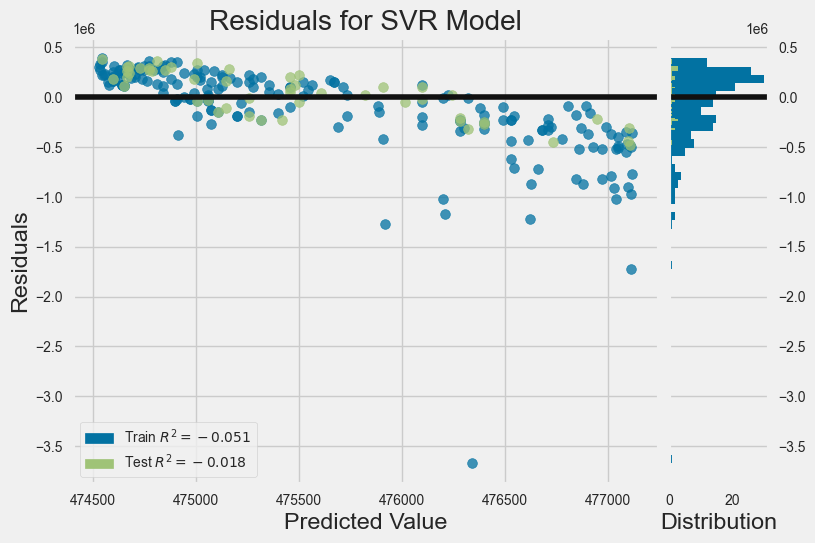

In [63]:
# Residuals Plot
visualizer_residuals = ResidualsPlot(lisbon_house_price_svr)
visualizer_residuals.fit(train_X, train_y.values.ravel())
visualizer_residuals.score(test_X, test_y.values.ravel())
visualizer_residuals.show();

<h2><span style="color: red;"> Model 6:- </span>Decision Tree</h2>Though our data is not large we will try this because of non-linearity of our model.

<h3><span style="color: brown;"> Hyper Parameter Tuning </span> Grid Search CV </h3>

In [64]:
# Define the range of values for the maximum depth hyperparameter
max_depth_values = [1, 2, 4, 8, 16]
param_grid = {'max_depth': max_depth_values}

gscv_decision_tree = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=5, scoring="r2")
gscv_decision_tree.fit(train_X, train_y)

print("Best max depth:", gscv_decision_tree.best_params_["max_depth"])

Best max depth: 2


<h3><span style="color: brown;"> Real Model </span> apply best parameter </h3>

In [65]:
# Create a new Decision tree model with the best hyperparameters
lisbon_house_price_decision_tree = DecisionTreeRegressor(max_depth=gscv_decision_tree.best_params_["max_depth"]).fit(train_X, train_y)
pred_y = lisbon_house_price_decision_tree.predict(test_X)

<h3><span style="color: brown;"> Feature Importance </span> </h3>

In [66]:
lisbon_house_price_decision_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.25693128,
       0.74306872, 0.        , 0.        ])

In [67]:
print_prediction(test_y,pred_y).head(10)

,Actual,Predicted
0,168000,336955.08
1,130000,336955.08
2,580000,336955.08
3,740000,668000.00
4,520000,668000.00
5,660000,336955.08
6,210000,336955.08
7,920000,959530.13
8,925000,959530.13
9,270000,336955.08


In [68]:
rmse_decision_tree,mae_decision_tree,r2_decision_tree=residual_check(test_y,pred_y)
compare_evaluation_metric('ridge','decision_tree')

rmse=  174095.81749866888 , mae=  146616.41816949152  and r2_score=  0.46135555800568395
RMSE wise ridge is better, it's RMSE value is= 147269.12026363693
MAE wise ridge is better, it's MAE value is= 108978.75436083166
R2 wise ridge is better, it's R2 value is= 0.6145670024765686


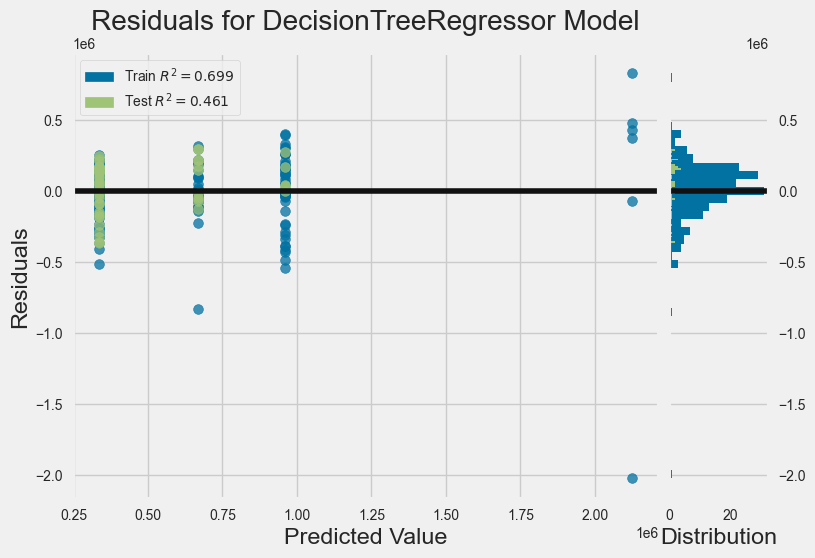

In [69]:
# Residuals Plot
visualizer_residuals = ResidualsPlot(lisbon_house_price_decision_tree)
visualizer_residuals.fit(train_X, train_y.values.ravel())
visualizer_residuals.score(test_X, test_y.values.ravel())
visualizer_residuals.show();

Visualize Decision Tree

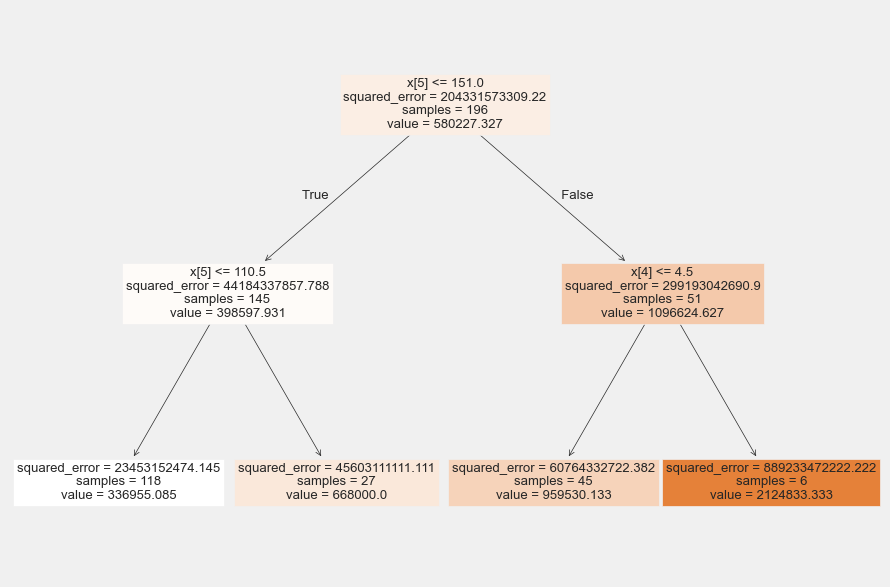

In [70]:
plt.figure(figsize=(10,7))
plot_tree(lisbon_house_price_decision_tree, filled=True)
plt.show()

<h2><span style="color: red;"> Model 8:- </span>Random Forest</h2> 1.Random Forests work well for capturing non-linear relationships between predictor and target variable so in our case we can use it. Also it is very good with new unseen data & robust to outliers.

<h3><span style="color: brown;"> Hyper Parameter Tuning </span> Grid Search CV </h3>

In [71]:
# Define the range of values for the n_estimators hyperparameter
param_grid_random_forest = {'n_estimators': [10, 50, 100, 150, 200]}

gscv_random_forest = GridSearchCV( RandomForestRegressor(), param_grid=param_grid_random_forest, cv=5, scoring="r2")
gscv_random_forest.fit(train_X,train_y)

print("Best n_estimators:", gscv_random_forest.best_params_["n_estimators"])

Best n_estimators: 50


<h3><span style="color: brown;"> Real Model </span> apply best parameter </h3>

In [72]:
random_seed=20
lisbon_house_price_random_forest = RandomForestRegressor(n_estimators=gscv_random_forest.best_params_["n_estimators"], random_state=random_seed).fit(train_X, train_y)
pred_y = lisbon_house_price_random_forest.predict(test_X)

<h3><span style="color: brown;"> Feature Importance </span> </h3>

In [73]:
lisbon_house_price_random_forest.feature_importances_

array([0.03768293, 0.00352905, 0.020691  , 0.03032524, 0.26595996,
       0.5799866 , 0.05793128, 0.00389394])

In [74]:
print_prediction(test_y,pred_y).head(10)

,Actual,Predicted
0,168000,205238.00
1,130000,233078.00
2,580000,304060.00
3,740000,728565.00
4,520000,614960.00
5,660000,447040.00
6,210000,205568.00
7,920000,930216.67
8,925000,990300.00
9,270000,346500.00


In [75]:
rmse_random_forest,mae_random_forest,r2_random_forest=residual_check(test_y,pred_y)
compare_evaluation_metric('ridge','random_forest')

rmse=  129744.23976700236 , mae=  83720.19245976245  and r2_score=  0.7008412713943077
RMSE wise, random_forest is better model than ridge model, RMSE for ridge is= 147269.12026363693
MAE wise, random_forest is better model than ridge model, MAE for ridge is= 108978.75436083166
R2 wise, random_forest is better model than ridge model, R2 for ridge is= 0.6145670024765686


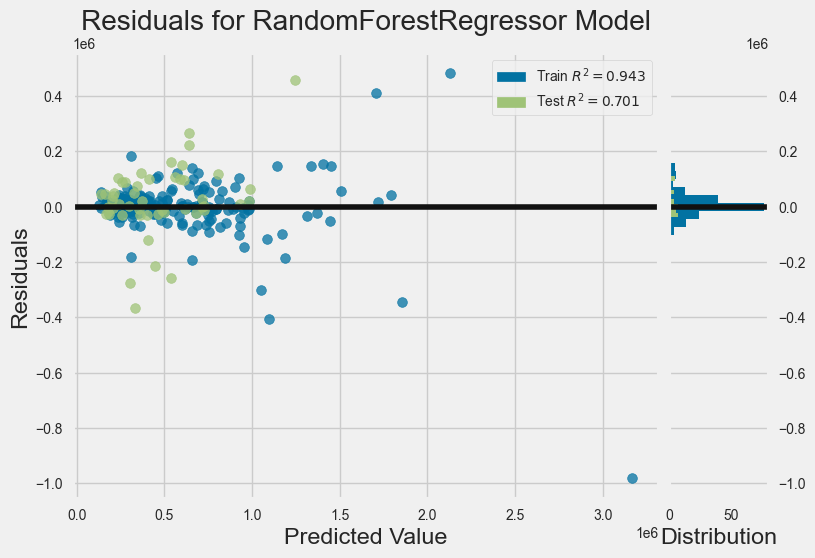

In [76]:
# Residuals Plot
visualizer_residuals = ResidualsPlot(lisbon_house_price_random_forest)
visualizer_residuals.fit(train_X, train_y.values.ravel())
visualizer_residuals.score(test_X, test_y.values.ravel())
visualizer_residuals.show();

<h1><span style="color: blue;"> Conclusion:- </span></h1>
<br>1. All models except SVM exhibited above-average performance, with Random Forest achieving the best results. Random Forest model explained 70% + of the data, demonstrating its superior predictive power. Feature analysis revealed that bathrooms and net area were the most significant predictors.
<br>2. Cross Validation Prediction was almost correct (except decision tree regressor). It could be due multiple reason like hyper parameter tuning or outlier or something else. We can check individual cross validation score to investigate further.
<h2><span style="color: red;"> Final Verdict:- </span></h2><br>
Random Forest is my recommended model. However, considering the potential for variations between property types and subtypes, developing multiple models tailored to specific property categories can be considered. Once we amass sufficient data, we can explore this approach further.